λ= 0.001 χ_max= 0.0002147448236018326 a= 0.10737241180091629
λ= 0.002 χ_max= 0.00042240310395605276 a= 0.10560077598901318
λ= 0.003 χ_max= 0.0006291489693351044 a= 0.10485816155585073
λ= 0.004 χ_max= 0.0007884187651727255 a= 0.09855234564659068
λ= 0.005 χ_max= 0.0009835109093318034 a= 0.09835109093318034
λ= 0.006 χ_max= 0.001178537594096736 a= 0.098211466174728
λ= 0.007 χ_max= 0.0013735283201433892 a= 0.0981091657245278
λ= 0.008 χ_max= 0.001568485512394226 a= 0.09803034452463912


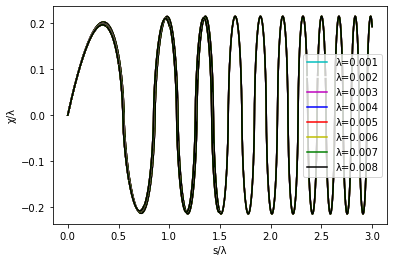

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint                         #Eq.(9) in research paper "The merger rate of primordial-black-hole binaries"
import math
λ_i=0.001
while λ_i<0.009:
    def f(u,s):
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_i*((u[0]**2+b**2)**(3/2))))]
    separation0= [1e-12,1]
    b=1e-6
    ss=np.linspace(1e-12,3e-3,1000)  
    us=odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_i
    Bs=separations/λ_i
    Bs_max= (np.max(Bs))
    χ_max=Bs_max*λ_i
    a=Bs_max/2
    print("λ=",λ_i,"χ_max=",χ_max,"a=",a)
    
    
    for color in ['c', 'w', 'm', 'b', 'r','y','g','k']:
         plt.plot(As,Bs,color=color)     
    λ_i+=0.001
    plt.xlabel('s/λ')
    plt.ylabel('χ/λ')
    plt.title('')
    plt.legend(["λ=0.001","λ=0.002","λ=0.003","λ=0.004","λ=0.005","λ=0.006","λ=0.007","λ=0.008"])
plt.show()

λ= 0.001 χ_max= 0.0004212434235913607 a= 0.21062171179568034
λ= 0.002 χ_max= 0.0007880305004346393 a= 0.19700762510865982
λ= 0.003 χ_max= 0.0011776645838052365 a= 0.19627743063420608
λ= 0.004 χ_max= 0.0015669335152996503 a= 0.1958666894124563
λ= 0.005 χ_max= 0.0019161134697040685 a= 0.19161134697040685
λ= 0.006 χ_max= 0.002131895280831601 a= 0.17765794006930008
λ= 0.007 χ_max= 0.002274801830285976 a= 0.16248584502042687
λ= 0.008 χ_max= 0.0023768471714749316 a= 0.1485529482171832


/Users/pratibhajangra/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


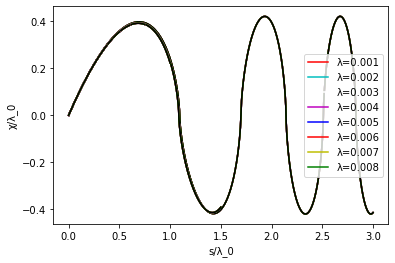

In [5]:
rho_eq=2.15368e-16
t_eq=1.59246e12
pi=3.14
G=6.67e-11                                   #Modification of eq.(9) in research paper "The merger rate of primordial-black-hole binaries"
λ_i=0.001
while λ_i<0.009:
    def n(s):
        return (1+(((8*pi*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(7/4)*s))

    def  k(s):
        return (1/n(s))

    def λ(s):
        return λ_i*k(s)

    def f(u,s):
            return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(2*λ(s)*((u[0]**2+b**2)**(3/2))))]
    b=1e-6
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,3e-3,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_i
    Bs=separations/λ_i
    plt.plot(As,Bs,'r')
    Bs_max= (np.max(Bs))
    χ_max=Bs_max*λ_i
    a=Bs_max/2
    print("λ=",λ_i,"χ_max=",χ_max,"a=",a)
    for color in ['c', 'w', 'm', 'b', 'r','y','g','k']:
         plt.plot(As,Bs,color=color)   
    λ_i+=0.001
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    plt.legend(["λ=0.001","λ=0.002","λ=0.003","λ=0.004","λ=0.005","λ=0.006","λ=0.007","λ=0.008"])
plt.show()

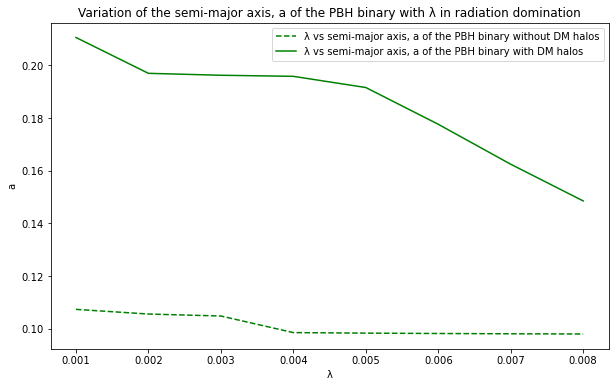

In [25]:
a = [0.10737,0.10560,0.10485,0.09855,0.09835,0.09821,0.09810,0.09803]
a_DM=[0.21062,0.19700,0.19627,0.19586,0.19161,0.17765,0.16248,0.14855]
λ=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008]


plt.figure(figsize=(10, 6))
plt.plot(λ,a,'g--')
plt.plot(λ,a_DM,'g')
plt.xlabel('λ')
plt.ylabel('a')
plt.legend(["λ vs semi-major axis, a of the PBH binary without DM halos","λ vs semi-major axis, a of the PBH binary with DM halos"])
plt.title('Variation of the semi-major axis, a of the PBH binary with λ in radiation domination')
plt.show()

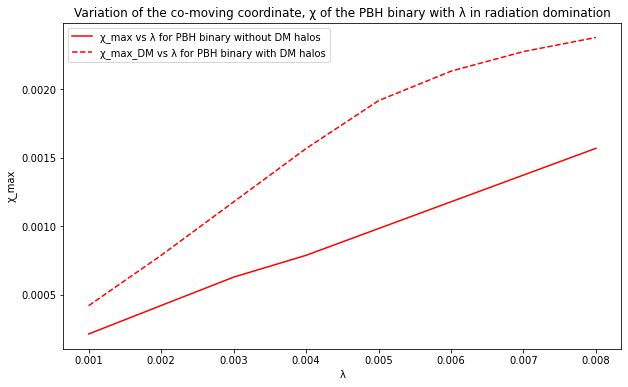

In [24]:
λ=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008]

χ_max = [0.0002147,0.0004224,0.0006291,0.0007884,0.0009835,0.0011785,0.0013735,0.0015684]

χ_max_DM =[0.0004212,0.0007880,0.0011776,0.0015669,0.001916,0.002131,0.002274,0.0023768]
plt.figure(figsize=(10, 6))
plt.plot(λ,χ_max,'r')
plt.plot(λ,χ_max_DM,'r--')
plt.legend(["χ_max vs λ for PBH binary without DM halos","χ_max_DM vs λ for PBH binary with DM halos"])
plt.xlabel('λ')
plt.ylabel('χ_max')
plt.title('Variation of the co-moving coordinate, χ of the PBH binary with λ in radiation domination')
plt.show()

λ= 1.0 χ_max= 0.23591526526652215 a= 0.11795763263326108
λ= 1.5 χ_max= 0.3768822763365075 a= 0.1256274254455025
λ= 2.0 χ_max= 0.5342458319395669 a= 0.13356145798489172
λ= 2.5 χ_max= 0.7122945917146717 a= 0.14245891834293434
λ= 3.0 χ_max= 0.914980027504827 a= 0.1524966712508045
λ= 3.5 χ_max= 1.093314284106452 a= 0.1561877548723503


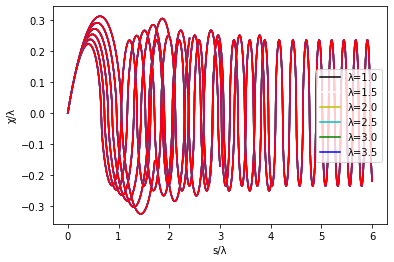

In [6]:
import math
λ_i=1.0
while λ_i<4.0:
    def h(x):
        return math.sqrt((x**-3)+(x**-4))          # Eq.(6) in research paper "The merger rate of primordial-black-hole binaries"
    def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5)))
    
    def f(u,s):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_i*((u[0]**2+b**2)
                          **(3/2))))] #eq. of binary having equal masses of PBHs without DM halos
    b=1e-4
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,6,10000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_i
    Bs=separations/λ_i
    Bs_max= (np.max(Bs))
    χ_max=Bs_max*λ_i
    a=Bs_max/2
    print("λ=",λ_i,"χ_max=",χ_max,"a=",a)
    
    for color in ['k', 'w', 'y', 'c', 'g','b','m','r']:
         plt.plot(As,Bs,color=color)     
    λ_i+=0.5
    plt.xlabel('s/λ')
    plt.ylabel('χ/λ')
    plt.legend(["λ=1.0","λ=1.5","λ=2.0","λ=2.5","λ=3.0","λ=3.5"])
plt.show()

In [ ]:
import math
rho_eq=2.15368e-16
t_eq=1.59246e12                        #Modification of eq.(6) in research paper "The merger rate of primordial-black-hole binaries"
pi=3.14
G=6.67e-11
λ_i=1.0
while λ_i<4.0:
    def h(x):
        return math.sqrt((x**-3)+(x**-4))
    def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5)))
    def n1(s):
        return (1+((((64*pi*G*rho_eq*(t_eq**2))/3)**(3/4))*(((((2*(s-2)*((s+1)**(1/2)))/3)+(4/3))**(1/2)))))

    def  k1(s):
        return (1/n1(s))
    def λ1(s):
        return λ_i*k1(s)
    def f(u,s):
         return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*2*λ1(s)*((u[0]**2
                                                                                    +b**2)**(3/2))))]

    b=1e-6
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,6,10000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_i
    Bs=separations/λ_i
    Bs_max= (np.max(Bs))
    χ_max=Bs_max*λ_i
    a=Bs_max/2
    print("λ=",λ_i,"χ_max=",χ_max,"a=",a)
    
    for color in ['k', 'w', 'y', 'c', 'r','b','g','m']:
         plt.plot(As,Bs,color=color)     
    plt.plot(As,Bs,color=color)
    λ_i+=0.5
    plt.xlabel('s/λ')
    plt.ylabel('χ/λ')
    plt.legend(["λ=1.0","λ=1.5","λ=2.0","λ=2.5","λ=3.0","λ=3.5"])
plt.show()

λ= 1.0 χ_max= 0.3942488695067911 a= 0.19712443475339556
λ= 1.5 χ_max= 0.5965020746895489 a= 0.19883402489651628
λ= 2.0 χ_max= 0.8026734769550274 a= 0.20066836923875686
λ= 2.5 χ_max= 1.0158441306921984 a= 0.20316882613843967
λ= 3.0 χ_max= 1.226935506958759 a= 0.2044892511597932
λ= 3.5 χ_max= 1.4449113472728539 a= 0.20641590675326485


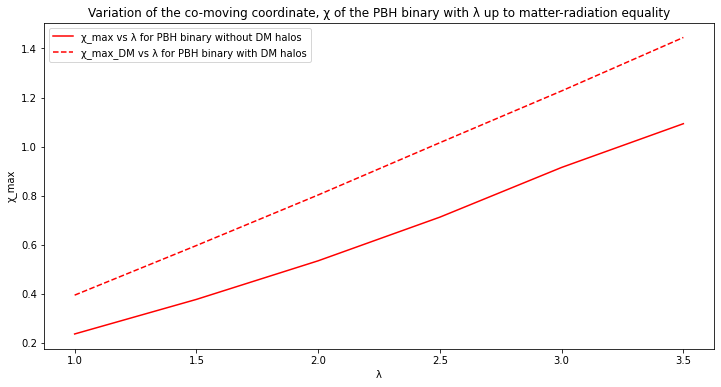

In [3]:
λ=[1.0,1.5,2.0,2.5,3.0,3.5]

χ_max = [0.23591,0.37688,0.53424,0.71229,0.91498,1.09331]

χ_max_DM =[0.39424,0.59650,0.80267,1.01583,1.22693,1.44491]

plt.figure(figsize=(12, 6))
plt.plot(λ,χ_max,'r')
plt.plot(λ,χ_max_DM,'r--')
plt.legend(["χ_max vs λ for PBH binary without DM halos","χ_max_DM vs λ for PBH binary with DM halos"])
plt.xlabel('λ')
plt.ylabel('χ_max')
plt.title('Variation of the co-moving coordinate, χ of the PBH binary with λ up to matter-radiation equality')
plt.show()